# Advanced RAG

#### Reading API KEYs from .env file

In [3]:
from dotenv import load_dotenv, find_dotenv
import os

_ = load_dotenv(find_dotenv())   
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")  

#### 1. Data Reading or Loading

In [4]:
# from langchain_community.document_loaders import PyPDFLoader

# loader1 = PyPDFLoader("./data/Raptor Contract.docx.pdf")
# loader2 = PyPDFLoader("./data/Robinson Advisory.docx.pdf")

# loaders = [loader1, loader2]
# documents = []
# for loader in loaders:
#     documents.extend(loader.load())

In [5]:
from IPython.display import display, Markdown
from pypdf import PdfReader

reader = PdfReader("./data/Raptor Contract.docx.pdf")
pdf_texts = [p.extract_text().strip() for p in reader.pages]

# Filter the empty strings
pdf_texts = [text for text in pdf_texts if text]

print(pdf_texts[0])

In [ ]:
type(pdf_texts), type(pdf_texts[0]), 

(list, str)

#### 2. Chunk the loaded data into Documents

In [ ]:
# from langchain.text_splitter import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter

# character_splitter = RecursiveCharacterTextSplitter(
#     separators=["\n\n", "\n", ". ", " ", ""],
#     chunk_size=1000,
#     chunk_overlap=0
# )
# character_split_docs = character_splitter.split_documents(documents)

# #print(f"{len(character_split_texts[10])} characters in 11th character_split_texts,\n\n{character_split_texts[10]}")
# print(f"\nTotal chunks : {len(character_split_docs)}")

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter

character_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", ". ", " ", ""],
    chunk_size=1000,
    chunk_overlap=0
)
character_split_texts = character_splitter.split_text('\n\n'.join(pdf_texts))

print(f"{len(character_split_texts[10])} characters in 11th character_split_texts,\n\n{character_split_texts[10]}")
print(f"\nTotal chunks: {len(character_split_texts)}")

995 characters in 11th character_split_texts,

assessment,
hearing,
complaint,
charge, 
demand
or
other
legal
proceeding
(whether
sounding
in
contract,
tort
or
otherwise,
whether
civil 
or
criminal
and
whether
brought
at
law
or
in
equity)
that
is
commenced,
brought,
conducted, 
tried
or
heard
by
or
before,
or
otherwise
involving,
any
Governmental
Authority .
“
Affiliate
”
means,
with
respect
to
any
specified
Person,
any
other
Person
directly
or 
indirectly
controlling,
controlled
by,
or
under
direct
or
indirect
common
control
with
such 
specified
Person.
For
purposes
of
the
foregoing,
a
Person
shall
be
deemed
to
control
a
specified 
Person
if
such
Person
(or
a
Family
Member
of
such
Person)
possesses,
directly
or
indirectly ,
the 
power
to
direct
or
cause
the
direction
of
the
management
and
policies
of
such
specified
Person.
“
Ancillary
Agreements
”
means
the
Escrow
Agreement,
the
Option
Cancellation 
Acknowledgments,
and
[and
the
Employment
Agreements].
“
Anti-Corruption
Laws
”
means
a

SentenceTransformer embedding use limited characters context windows. In fact, it is 256. 
Then, chunk the character_split_texts into Token_split_texts. This would be a group of 256 or less.

In [ ]:
token_splitter = SentenceTransformersTokenTextSplitter(chunk_overlap=0, tokens_per_chunk=256)

token_split_texts = []
for text in character_split_texts:
    token_split_texts += token_splitter.split_text(text)

print(f"{len(token_split_texts[10])} tokens in 11th token_split_texts,\n\n{token_split_texts[10]}")

print(f"\nTotal chunks: {len(token_split_texts)}")

/home/crs/10Academy/w11/Contract-Advisor-RAG/w11_rag/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


993 tokens in 11th token_split_texts,

assessment, hearing, complaint, charge, demand or other legal proceeding ( whether sounding in contract, tort or otherwise, whether civil or criminal and whether brought at law or in equity ) that is commenced, brought, conducted, tried or heard by or before, or otherwise involving, any governmental authority. “ affiliate ” means, with respect to any specified person, any other person directly or indirectly controlling, controlled by, or under direct or indirect common control with such specified person. for purposes of the foregoing, a person shall be deemed to control a specified person if such person ( or a family member of such person ) possesses, directly or indirectly, the power to direct or cause the direction of the management and policies of such specified person. “ ancillary agreements ” means the escrow agreement, the option cancellation acknowledgments, and [ and the employment agreements ]. “ anti - corruption laws ” means any applica

Embed each token_split_texts at one vector. SentenceTransformerEmbeddingFunction will embed each token and finally embed into one vector, the group of tokens, which is token_split_texts. 

Furthermore, we will store them into chroma, our vector database.

In [ ]:
import chromadb
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

embedding_function = SentenceTransformerEmbeddingFunction()

In [ ]:
#display(Markdown(f"{embedding_function([token_split_texts[10]])}"))
display(embedding_function([token_split_texts[10]]))

[[-0.06615419685840607,
  0.021851684898138046,
  -0.049496542662382126,
  -0.03747585788369179,
  -0.08779998123645782,
  0.008753119967877865,
  0.053294893354177475,
  -0.005156119354069233,
  0.004735815804451704,
  -0.0007585746352560818,
  0.13133032619953156,
  -0.0016952557489275932,
  0.05872916430234909,
  -0.013608510605990887,
  -0.015575163997709751,
  0.037881575524806976,
  0.02892022207379341,
  0.04289724677801132,
  -0.0682736188173294,
  0.022076698020100594,
  -0.0034120327327400446,
  -0.006562951486557722,
  -0.05578169599175453,
  0.0331386961042881,
  -0.02372860163450241,
  -0.0676686093211174,
  -0.008463663049042225,
  -0.01574673503637314,
  0.014574338681995869,
  -0.10380740463733673,
  0.02849063090980053,
  -0.0001045461103785783,
  0.07616792619228363,
  0.050560902804136276,
  0.006583705078810453,
  0.01305689662694931,
  0.019256727769970894,
  -0.049912042915821075,
  -0.016967307776212692,
  -0.013793987222015858,
  0.05710086226463318,
  -0.023896

The Sentences Transformer is the extension of Bert Transformer architecture.

In [ ]:
len(embedding_function([token_split_texts[10]]))

1

Set up Chroma client.
Make a new collection. Create an index for each embedded token_split_texts 

In [ ]:
chroma_client = chromadb.Client()
chroma_collection = chroma_client.create_collection("microsoft_annual_report_2022", embedding_function=embedding_function)

ids = [str(i) for i in range(len(token_split_texts))]
chroma_collection.add(ids=ids, documents=token_split_texts)
chroma_collection.count()

259

In [ ]:
display(Markdown(f"{chroma_collection}"))

name='microsoft_annual_report_2022' id=UUID('92314def-5d7f-47c8-9b04-f1813ff40d85') metadata=None tenant='default_tenant' database='default_database'

### Everything is set. Let's connect an LLM and build a fully fledged RAG

In [ ]:
query = "How much is the escrow amount?"

# Chroma will automatically embed the query for us. So, we don't need to do it manually
results = chroma_collection.query(query_texts=[query], n_results=5)
retrieved_documents = results['documents'][0]      # the 0 means retrieve or give the result of 1st query in query_texts list.   

display(results)


{'ids': [['79', '81', '78', '62', '80']],
 'distances': [[0.7636401653289795,
   0.8324612379074097,
   0.8482997417449951,
   0.8590202331542969,
   0.9255144596099854]],
 'metadatas': [[None, None, None, None, None]],
 'embeddings': None,
 'documents': [['with the escrow agreement. the escrow amount shall be held and, subject to section 2. 07, released to the company securityholders in accordance with the provisions of the escrow agreement with the company securityholders being entitled to share in such released amounts in accordance with their pro rata percentages. from and after the closing, buyer and the sellers ’ representative will direct the escrow agent to disburse payments from the escrow account in accordance with the purchase price adjustment provisions of this agreement and the terms of the escrow agreement including : ( a ) in the case of any disbursement that is required by the terms of this agreement and as to which there is no dispute ( or as to which the disputing par

In [ ]:
# We didn't meet the expected result. Which means that our Retrieval didn't provide the\
# relevant answer (context) to the question

Now, we can use LLM to generated an answer to the embedded query.

#### Generation

In [ ]:
import os
import openai
from openai import OpenAI
from langchain.chat_models import ChatOpenAI

# from dotenv import load_dotenv, find_dotenv
# _ = load_dotenv(find_dotenv()) # read local .env file
# #openai.api_key = os.environ['OPENAI_API_KEY']

openai_client = OpenAI() #ChatOpenAI()

Let's define our function that will allow us to call out the model and the retrieved document along with the query.

In [ ]:
def rag(query, retrieved_documents, model= "gpt-3.5-turbo"):
    information = "\n\n".join(retrieved_documents)
    messages = [
        {
            "role": "system",
            "content": "You are a helpful expert contract research assistant. Your users are asking questions about information contained in a contract document."
            "You will be shown the user's question, and the relevant information from the contract document. Answer the user's question using only this information."
        },
        {
            "role": "user",
            "content": f"Question: {query}. \n Information: {information}"
        }
    ]

    response = openai_client.chat.completions.create(
        model = model,
        messages = messages,
    )

    content = response.choices[0].message.content

    return content

In [ ]:
output = rag(query=query, retrieved_documents=retrieved_documents)

display(Markdown(f" **{output}**"))

 **The escrow amount is to be held in escrow and shall be available solely for the purpose of satisfying obligations of the company securityholders, if any, as provided in section 2.07(f) of the escrow agreement. The release of the escrow amount will be governed by the provisions of the escrow agreement. The specific amount of the escrow is not disclosed in the provided information.**

### This model is not performing well.
* **The expected answer is: The escrow amount is equal to $1,000,000.**
- **Pitfalls of retrieval - when simple vector search fails!**


First thing we think is good to do, is to visualize the embedding space. Of course we have a high dimensions. We will project those dimensions down into two dimensions by using UMAP (Uniform Manifold Approximation). It will be usefull for reasoning about the structure of the embeddings space. UMAP is like PCA, except UMAP tries to peserve the structure of the data in terms of the distances between points as much as it can, unlike for instance PCA, which tries to find the dominant directions and project them down.

In [ ]:
import umap
import numpy as np
from tqdm import tqdm

embeddings = chroma_collection.get(include=['embeddings'])["embeddings"]
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

/home/crs/10Academy/w11/Contract-Advisor-RAG/w11_rag/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
def project_embeddings(embeddings, umap_transform):
    """
    Project embeddings dimensions down into two dimensions
    :embeddings: embeddings provided 
    :umap_transform: umap_transform set based on the original embeddings or embeddings of the holistic data
    :return: projection in 2 two dimensions of the provided embeddings
    """
    umap_embeddings = np.empty((len(embeddings), 2))
    for i, embedding in enumerate(tqdm(embeddings)):
        umap_embeddings[i] = umap_transform.transform([embedding])
    return umap_embeddings

In [ ]:
projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)

  0%|          | 0/259 [00:00<?, ?it/s]

100%|██████████| 259/259 [17:39<00:00,  4.09s/it]


(-1.2737887144088744, 7.09638478755951, 1.971159529685974, 7.098475384712219)

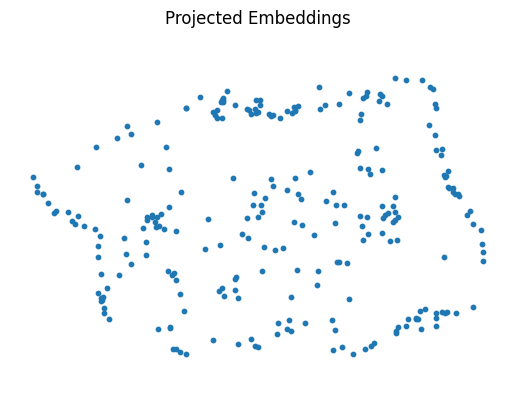

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projected Embeddings')
plt.axis('off')

### Relevancy and Distraction

Let's use our previous query

In [ ]:
query = "How much is the escrow amount?"

results = chroma_collection.query(query_texts= [query], n_results =5, include=['documents','embeddings'])
retrieved_documents = results["documents"][0]

for doc in retrieved_documents:
    display(Markdown(f"{doc}"))

with the escrow agreement. the escrow amount shall be held and, subject to section 2. 07, released to the company securityholders in accordance with the provisions of the escrow agreement with the company securityholders being entitled to share in such released amounts in accordance with their pro rata percentages. from and after the closing, buyer and the sellers ’ representative will direct the escrow agent to disburse payments from the escrow account in accordance with the purchase price adjustment provisions of this agreement and the terms of the escrow agreement including : ( a ) in the case of any disbursement that is required by the terms of this agreement and as to which there is no dispute ( or as to which the disputing party has failed to notify the escrow agent and the other parties of its dispute in accordance with any applicable requirements under this agreement and the escrow agreement ), they will provide prompt joint payment instructions directing the escrow agent

the purchase price ( as set forth in section 2. 07 ( e ) ) and any such claim shall expire upon the termination of the escrow agreement. section i. 05 withholding rights. ( a ) ( a ) notwithstanding any other provision of this agreement, each of the buyer or anyone acting on its behalf, the paying agent, the escrow agent and the section 102 trustee and any other applicable withholding agent ( each a “ payor ” ), shall be entitled to deduct and withhold from the closing cash payment and from any other payments otherwise required pursuant to this agreement, such amount in cash as the buyer and / or such anyone acting on its behalf is required to deduct and withhold with respect to any payments under the code or any provision of state, local, provincial or foreign law, unless the applicable payee ( as defined below ) provides the payor, at least five days prior to the proposed date of such payment, with a valid withholding certificate obtained from the applicable tax authorities, exempting

securityholder by wire transfer of immediately available funds its pro rata percentage of the amount, if any, by which such re - calculated final purchase price exceeds the estimated purchase price paid at closing in accordance with section 2. 05 ( a ) ( i ) and section 2. 07 ( a ) and the escrow agent shall release the escrow amount to company securityholders in accordance with the escrow agreement or ( ii ) the amount, if any, by which such estimated purchase price paid at closing in accordance with section 2. 05 ( a ) ( i ) and section 2. 07 ( a ) exceeds such re - calculated final purchase price shall be paid to the buyer, or its designee, in accordance with the terms of the escrow agreement ( and any remaining balance of the escrow amount not required to be paid to the buyer shall be released to company securityholders in accordance with the terms of the escrow agreement ). section i. 04 escrow. ( a ) at closing, buyer will deposit the escrow amount in escrow on behalf of the sellers in accordance

be governed by the terms of the escrow agreement. all funds contained in the escrow account shall be held in escrow and shall be available solely for the purpose of satisfying obligations of the company securityholders, if any, as provided in section 2. 07 ( f ). section ii. 05 closing deliveries. ( a ) buyer closing deliveries. upon the terms and subject to the conditions set forth in this agreement, the buyer shall deliver or cause to be delivered at the closing the following : ( i ) pay or cause to be paid the closing cash amounts as set forth above, each payment by wire transfer of immediately available funds denominated in u. s. dollars to an account or accounts specified on the allocation statement ; ( ii ) to the sellers ’ representative, the employment agreements and any other ancillary agreements to be entered into by buyer or parent at closing, executed by buyer or parent ( as applicable ) ; ( iii ) to the escrow agent, by wire transfer of immediately available funds, the escrow

to make such disbursement and ( b ) in the case of a disbursement as to which either the buyer or the seller ’ s representative has notified the other and the escrow agent ( in accordance with any notice and timing requirements applicable under this agreement and the escrow agreement ) that there is a good faith dispute, they will provide joint payment instructions to the escrow agent to direct the appropriate disbursement promptly upon the resolution, in accordance with the provisions of this agreement, of such dispute. ( b ) recovery from the escrow amount shall constitute the buyer ’ s exclusive remedy against the company securityholders in connection with any claim relating to any adjustments of - 21 - 112923184 _ 5

In [ ]:
query_embedding = embedding_function([query])[0]        # embedding of query
retrieved_embeddings = results['embeddings'][0]         # retrieved embeddng of query

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:20<00:00,  4.19s/it]


(-1.2737887144088744, 7.09638478755951, 1.971159529685974, 7.098475384712219)

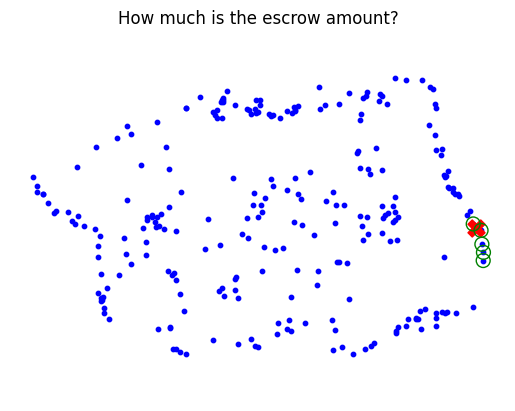

In [ ]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='blue')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

- This is the visualization of the query and the retrieved embeddings. 
- The green circle circles the data points that are retrieving.
- The red X is the query.

- As, you can see, we are retrieving a general knowledge not the relevant ones. 
- Our model has been distracted.

##### Another example
- `query = "Are there any conditions to the closing?"` 
- `answer = "No, as the signing and closing are simultaneous."`

In [ ]:
# Another example
query = "Are there any conditions to the closing?"

results = chroma_collection.query(query_texts=[query], n_results=5, include=["documents", "embeddings"])
retrived_documents = results["documents"][0]

for doc in retrieved_documents:
    display(Markdown(f"{doc}"))

with the escrow agreement. the escrow amount shall be held and, subject to section 2. 07, released to the company securityholders in accordance with the provisions of the escrow agreement with the company securityholders being entitled to share in such released amounts in accordance with their pro rata percentages. from and after the closing, buyer and the sellers ’ representative will direct the escrow agent to disburse payments from the escrow account in accordance with the purchase price adjustment provisions of this agreement and the terms of the escrow agreement including : ( a ) in the case of any disbursement that is required by the terms of this agreement and as to which there is no dispute ( or as to which the disputing party has failed to notify the escrow agent and the other parties of its dispute in accordance with any applicable requirements under this agreement and the escrow agreement ), they will provide prompt joint payment instructions directing the escrow agent

the purchase price ( as set forth in section 2. 07 ( e ) ) and any such claim shall expire upon the termination of the escrow agreement. section i. 05 withholding rights. ( a ) ( a ) notwithstanding any other provision of this agreement, each of the buyer or anyone acting on its behalf, the paying agent, the escrow agent and the section 102 trustee and any other applicable withholding agent ( each a “ payor ” ), shall be entitled to deduct and withhold from the closing cash payment and from any other payments otherwise required pursuant to this agreement, such amount in cash as the buyer and / or such anyone acting on its behalf is required to deduct and withhold with respect to any payments under the code or any provision of state, local, provincial or foreign law, unless the applicable payee ( as defined below ) provides the payor, at least five days prior to the proposed date of such payment, with a valid withholding certificate obtained from the applicable tax authorities, exempting

securityholder by wire transfer of immediately available funds its pro rata percentage of the amount, if any, by which such re - calculated final purchase price exceeds the estimated purchase price paid at closing in accordance with section 2. 05 ( a ) ( i ) and section 2. 07 ( a ) and the escrow agent shall release the escrow amount to company securityholders in accordance with the escrow agreement or ( ii ) the amount, if any, by which such estimated purchase price paid at closing in accordance with section 2. 05 ( a ) ( i ) and section 2. 07 ( a ) exceeds such re - calculated final purchase price shall be paid to the buyer, or its designee, in accordance with the terms of the escrow agreement ( and any remaining balance of the escrow amount not required to be paid to the buyer shall be released to company securityholders in accordance with the terms of the escrow agreement ). section i. 04 escrow. ( a ) at closing, buyer will deposit the escrow amount in escrow on behalf of the sellers in accordance

be governed by the terms of the escrow agreement. all funds contained in the escrow account shall be held in escrow and shall be available solely for the purpose of satisfying obligations of the company securityholders, if any, as provided in section 2. 07 ( f ). section ii. 05 closing deliveries. ( a ) buyer closing deliveries. upon the terms and subject to the conditions set forth in this agreement, the buyer shall deliver or cause to be delivered at the closing the following : ( i ) pay or cause to be paid the closing cash amounts as set forth above, each payment by wire transfer of immediately available funds denominated in u. s. dollars to an account or accounts specified on the allocation statement ; ( ii ) to the sellers ’ representative, the employment agreements and any other ancillary agreements to be entered into by buyer or parent at closing, executed by buyer or parent ( as applicable ) ; ( iii ) to the escrow agent, by wire transfer of immediately available funds, the escrow

to make such disbursement and ( b ) in the case of a disbursement as to which either the buyer or the seller ’ s representative has notified the other and the escrow agent ( in accordance with any notice and timing requirements applicable under this agreement and the escrow agreement ) that there is a good faith dispute, they will provide joint payment instructions to the escrow agent to direct the appropriate disbursement promptly upon the resolution, in accordance with the provisions of this agreement, of such dispute. ( b ) recovery from the escrow amount shall constitute the buyer ’ s exclusive remedy against the company securityholders in connection with any claim relating to any adjustments of - 21 - 112923184 _ 5

In [ ]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results["embeddings"][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|██████████| 5/5 [00:19<00:00,  3.85s/it]


(-1.2737887144088744, 7.09638478755951, 1.971159529685974, 7.098475384712219)

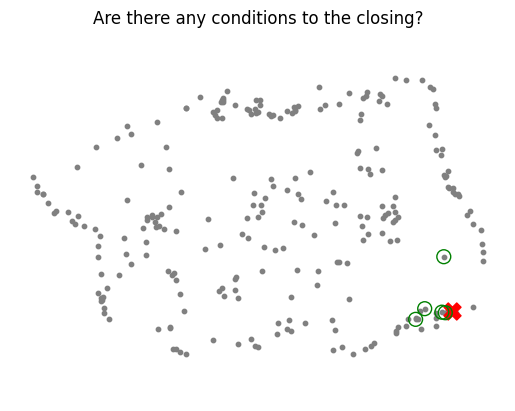

In [ ]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

- Distractors are irrelevant information in our results. They distract the model and they are difficult to debug.
- Better to make our retriever robust in order to return only relevant information and not distractots.

## Query Expansion

There is many NLP methods to improve relancy of query results. But what is new I have powerful LLMs, and we can use those to augment and enhance the queries we send to our vector-based retrieval to get better results.

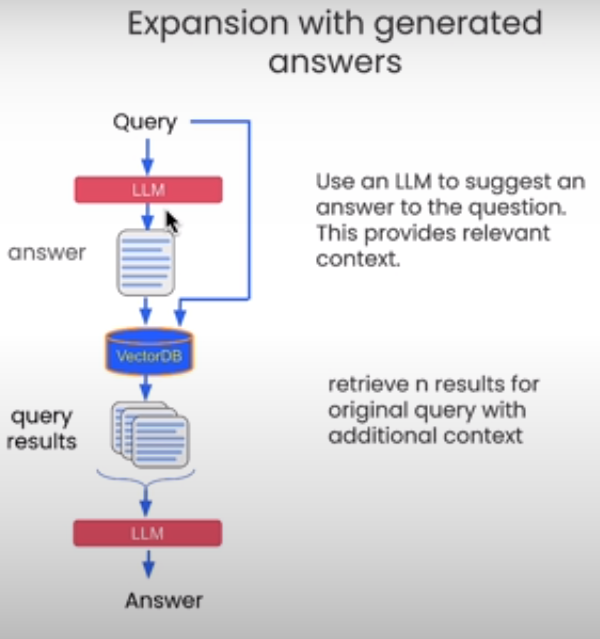

You take your query and you pass it over to an LLM, which prompt to generate a hypothetical or imagined answer to your query and you can concatenate your query with the imagined answer and use that as the new query, which you pass to your retrieval system or vector store. Then you return your query results as normal.

In [ ]:
chroma_client = chromadb.Client()
chroma_collection = chroma_client.create_collection("microsoft_annual_report_2022", embedding_function=embedding_function)

ids = [str(i) for i in range(len(token_split_texts))]
chroma_collection.add(ids=ids, documents=token_split_texts)
chroma_collection.count()

259

In [ ]:
import umap

embeddings = chroma_collection.get(include=['embeddings'])['embeddings']
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)
projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)

## Expansion with generated answers

https://arxiv.org/abs/2305.03653

In [ ]:
def augment_query_generated(query, model="gpt-3.5-turbo"):
    messages =[
        {
            "role": "system",
            "content": "You are a helpful expert contract research assistant. Provide an example \
                answer to the given question, that might be found in a document like a contract document."
        },
        {
            "role": "user", "content": query
        }
    ]
    response = openai_client.chat.completions.create(
        model= model,
        messages = messages,
    )
    content = response.choices[0].message.content
    return content

In [ ]:
original_query = "How much is the escrow amount?"
hypothetical_answer = augment_query_generated(original_query)

joint_query = f"{original_query} {hypothetical_answer}"
display(Markdown(f"{joint_query}"))

How much is the escrow amount? The escrow amount for this agreement shall be $10,000 and shall be held by the escrow agent until the completion of the project.

In [ ]:
result = chroma_collection.query(query_texts=[joint_query], n_results=5, include=['documents', 'embeddings'])
retrieved_documents = results["documents"][0]

for doc in retrieved_documents:
    display(Markdown(f"{doc}"))


NameError: name 'chroma_collection' is not defined

In [ ]:
retrieved_embeddings = results['embeddings'][0]
original_query_embedding = embedding_function([original_query])
augmented_query_embedding = embedding_function([joint_query])

projected_original_query_embedding = project_embeddings(original_query_embedding, umap_transform)
projected_augmented_query_embedding = project_embeddings(augmented_query_embedding, umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

In [ ]:
import matplotlib.pyplot as plt

# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')
plt.scatter(projected_original_query_embedding[:, 0], projected_original_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_augmented_query_embedding[:, 0], projected_augmented_query_embedding[:, 1], s=150, marker='X', color='orange')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{original_query}')
plt.axis('off')